In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
choques = np.load("npys/l=0005ySca=4\choques_3.npy")
choques_radar = np.load("npys/l=0005ySca=4\choques_radar_3.npy")

In [3]:
def divide_set(matrix):
    densidad_9 = matrix[:, matrix[0] < 4400]
    densidad_5 = matrix[:, (4400 <= matrix[0]) & (matrix[0] < 8000)]
    densidad_0 = matrix[:, (8000 <= matrix[0]) & (matrix[0] < 11600)]
    densidad_2 = matrix[:, (11600 <= matrix[0]) & (matrix[0] < 15200)]
    densidad_4 = matrix[:, (15200 <= matrix[0]) & (matrix[0] < 18800)]

    densidad_5 = np.hstack((densidad_5, matrix[:, matrix[0] >= 18800]))

    return densidad_0, densidad_2, densidad_4, densidad_5, densidad_9

In [4]:
def calculate_avg_travel_time(matrix):
    time_in = matrix[0,:]
    time_out = matrix[1,:]
    return np.mean(time_out - time_in)

In [5]:
def calculate_results(simulaciones):
    vr = [[],[],[],[],[]]

    d0s = np.array([])
    d2s = np.array([])
    d4s = np.array([])
    d5s = np.array([])
    d9s = np.array([])

    for i in range(len(simulaciones)):
        d0,d2,d4,d5,d9 = divide_set(simulaciones[i])

        vr[0].append(calculate_avg_travel_time(d0))
        vr[1].append(calculate_avg_travel_time(d2))
        vr[2].append(calculate_avg_travel_time(d4))
        vr[3].append(calculate_avg_travel_time(d5))
        vr[4].append(calculate_avg_travel_time(d9))

        d0s = np.hstack((d0s, d0[2,:]))
        d2s = np.hstack((d2s, d2[2,:]))
        d4s = np.hstack((d4s, d4[2,:]))
        d5s = np.hstack((d5s, d5[2,:]))
        d9s = np.hstack((d9s, d9[2,:]))
    
    return vr,d0s,d2s,d4s,d5s,d9s


In [6]:
sim0 = np.load("npys/l=001ySca=3/results0.npy")
sim1 = np.load("npys/l=001ySca=3/results1.npy")
sim2 = np.load("npys/l=001ySca=3/results2.npy")
sim3 = np.load("npys/l=001ySca=3/results3.npy")
sim4 = np.load("npys/l=001ySca=3/results4.npy")
sim5 = np.load("npys/l=001ySca=3/results5.npy")
sim6 = np.load("npys/l=001ySca=3/results6.npy")
sim7 = np.load("npys/l=001ySca=3/results7.npy")
sim8 = np.load("npys/l=001ySca=3/results8.npy")
sim9 = np.load("npys/l=001ySca=3/results9.npy")
sim10 = np.load("npys/l=001ySca=3/results10.npy")
sim11 = np.load("npys/l=001ySca=3/results11.npy")
sim12 = np.load("npys/l=001ySca=3/results12.npy")
sim13 = np.load("npys/l=001ySca=3/results13.npy")
sim14 = np.load("npys/l=001ySca=3/results14.npy")

agg_results,d0s,d2s,d4s,d5s,d9s = calculate_results([sim0, sim1, sim2, sim3, sim4, sim5, sim6, sim7, sim8, sim9, sim10, sim11, sim12, sim13, sim14])

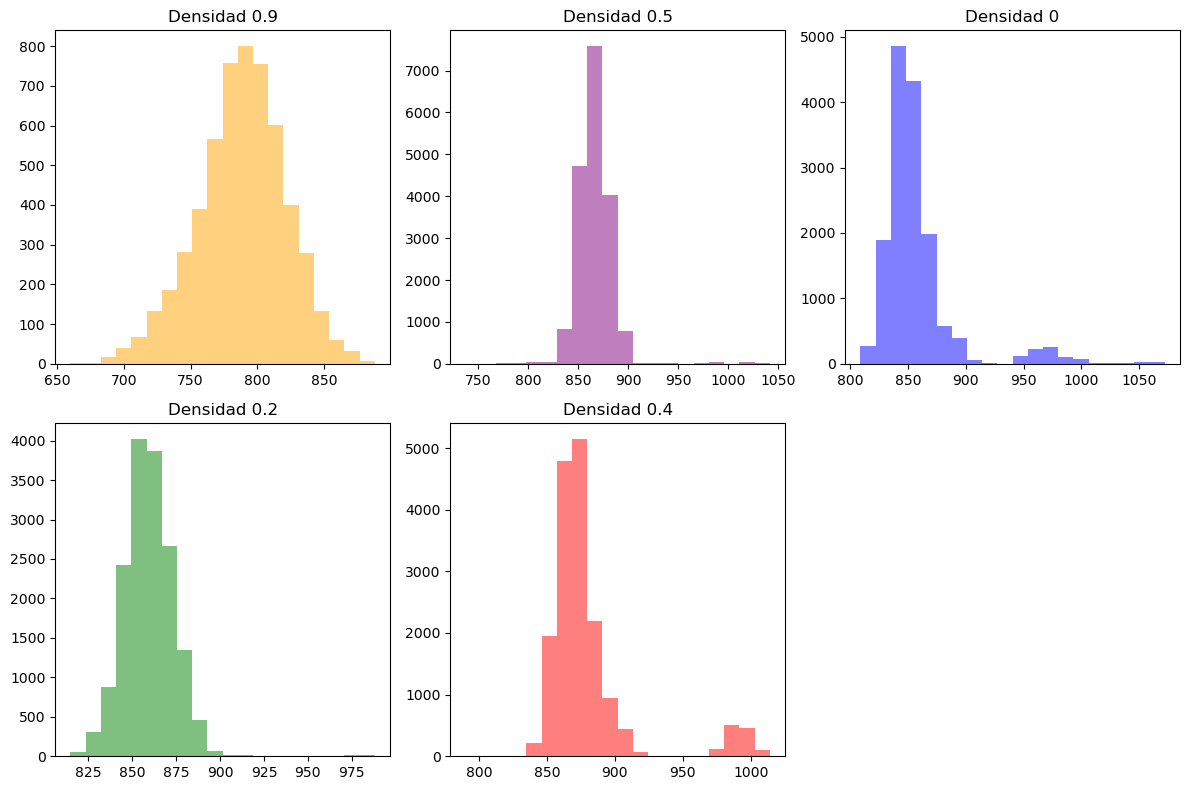

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and arrange subplots in a 2x3 grid
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 3)
plt.hist(d0s, color='blue', bins=20, alpha=0.5)
plt.title('Densidad 0')

plt.subplot(2, 3, 4)
plt.hist(d2s, color='green', bins=20, alpha=0.5)
plt.title('Densidad 0.2')

plt.subplot(2, 3, 5)
plt.hist(d4s, color='red', bins=20, alpha=0.5)
plt.title('Densidad 0.4')

plt.subplot(2, 3, 2)
plt.hist(d5s, color='purple', bins=20, alpha=0.5)
plt.title('Densidad 0.5')

plt.subplot(2, 3, 1)
plt.hist(d9s, color='orange', bins=20, alpha=0.5)
plt.title('Densidad 0.9')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure with all histograms
plt.show()

In [11]:
data = np.load("spd.npy")

